#### Import the necessary Libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Step 1: Load the Dataset
#####

In [17]:
df=pd.read_csv(r"C:\Users\naina\Downloads\data.csv")

In [18]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
# Display basic information
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Step 2: Understand the Data
##### Check for missing values and understand the distribution of the data:

In [20]:
# Check for missing values
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


We can see that there are no null values in our dataset.

In [21]:
# Display unique values in the diagnosis column
print(df['diagnosis'].unique())

# Display the count of each diagnosis
print(df['diagnosis'].value_counts())

['M' 'B']
diagnosis
B    357
M    212
Name: count, dtype: int64


**diagnosis:** Indicates the type of cancer. 
* The dataset has two classes: 'M' for malignant and 'B' for benign.
* There are 357 benign cases and 212 malignant cases

#### Step 3: Visualize the Data
##### Visualize the distribution of each feature to understand their spread and identify any outliers:

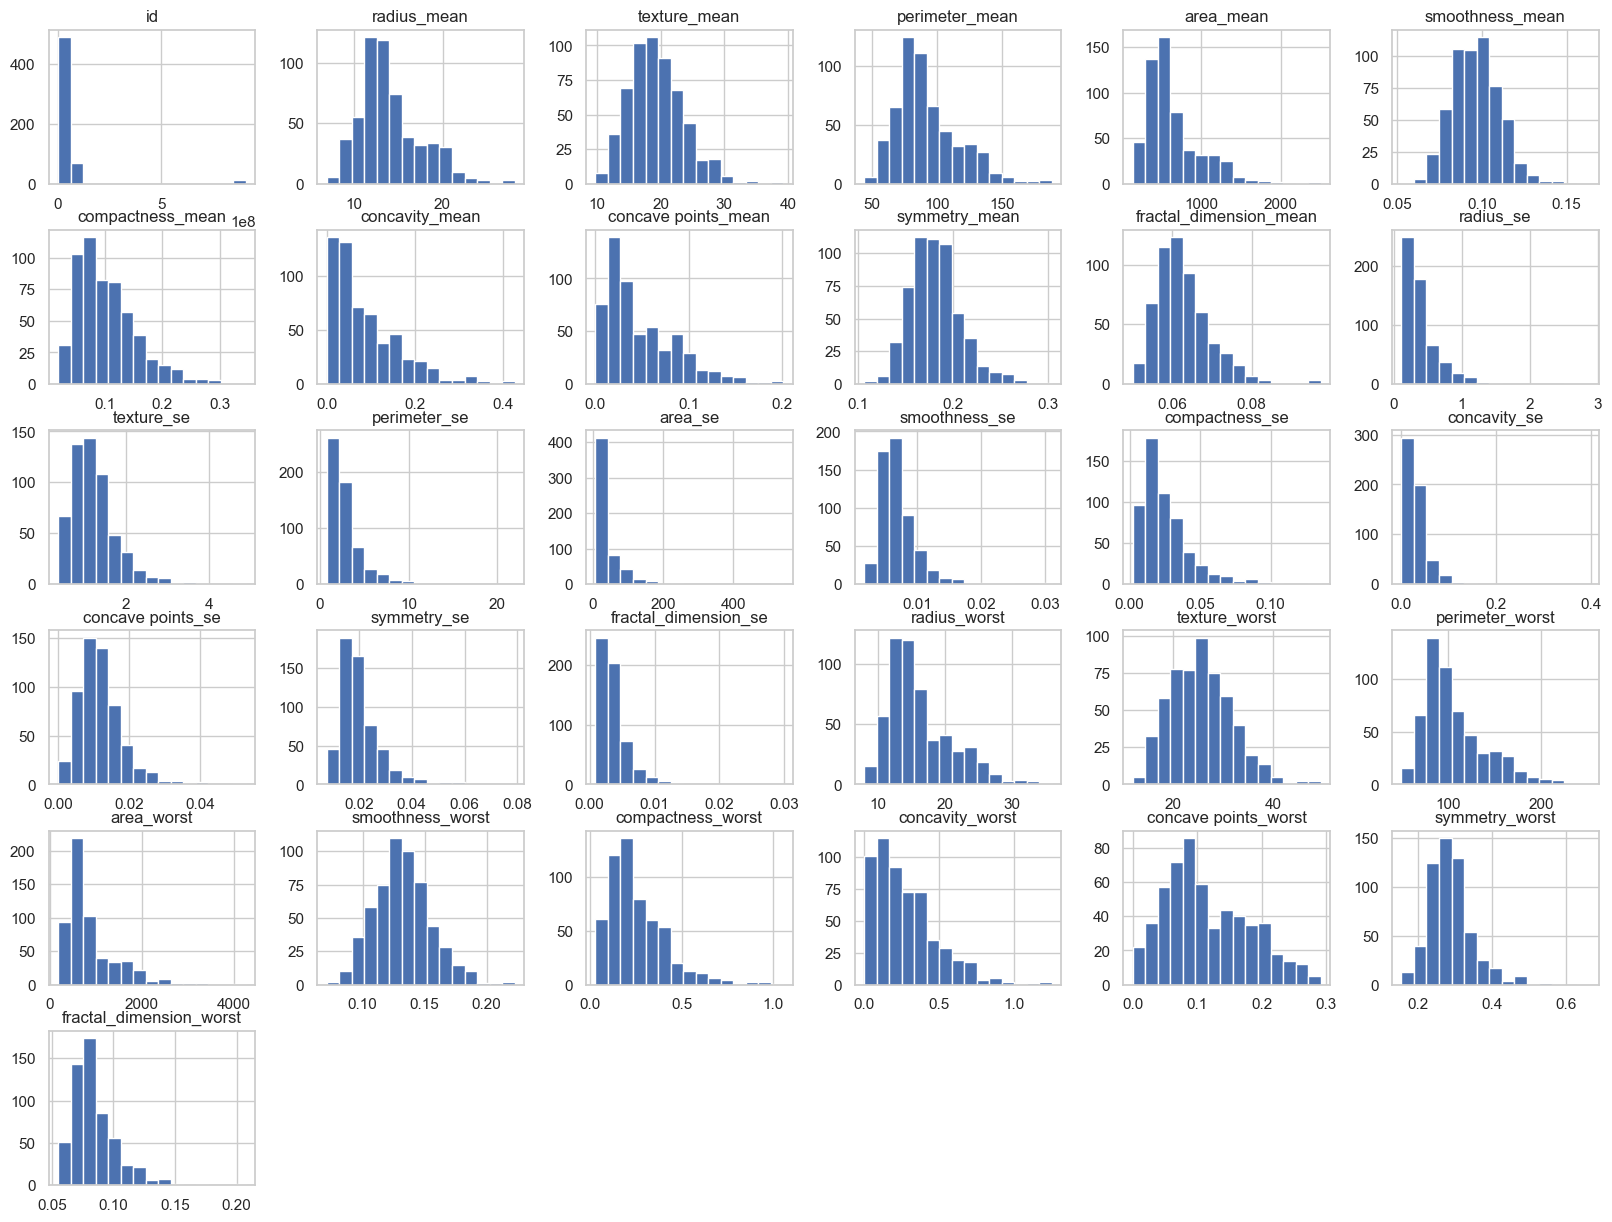

In [22]:
# Histograms for each feature
df.hist(bins=15,figsize=(20,15))
plt.show()

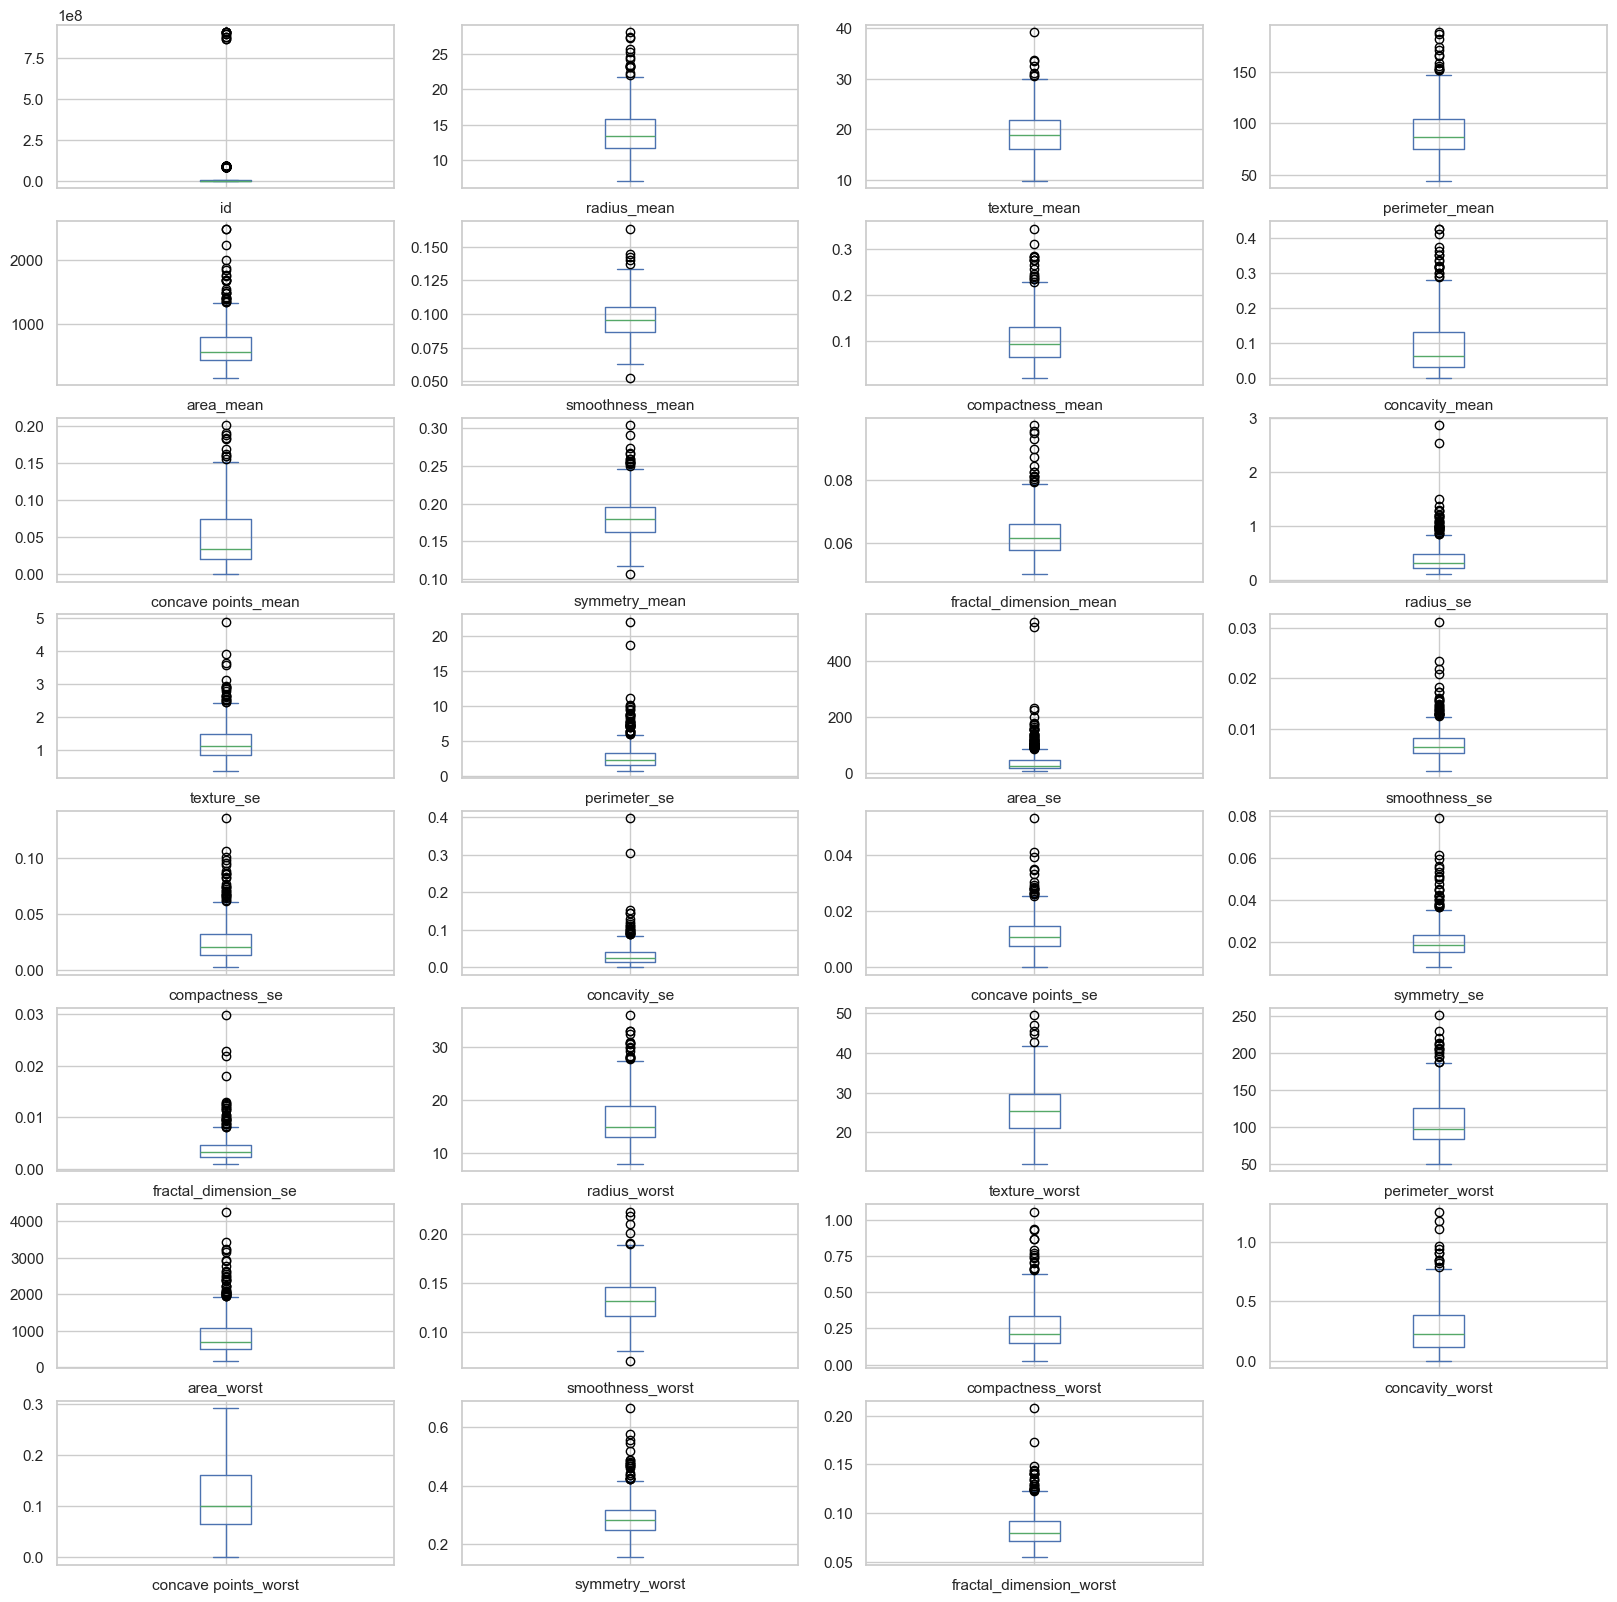

In [23]:
# Boxplots for each feature
df.plot(kind='box',subplots=True, layout=(8, 4), figsize=(20, 20) )
plt.show()

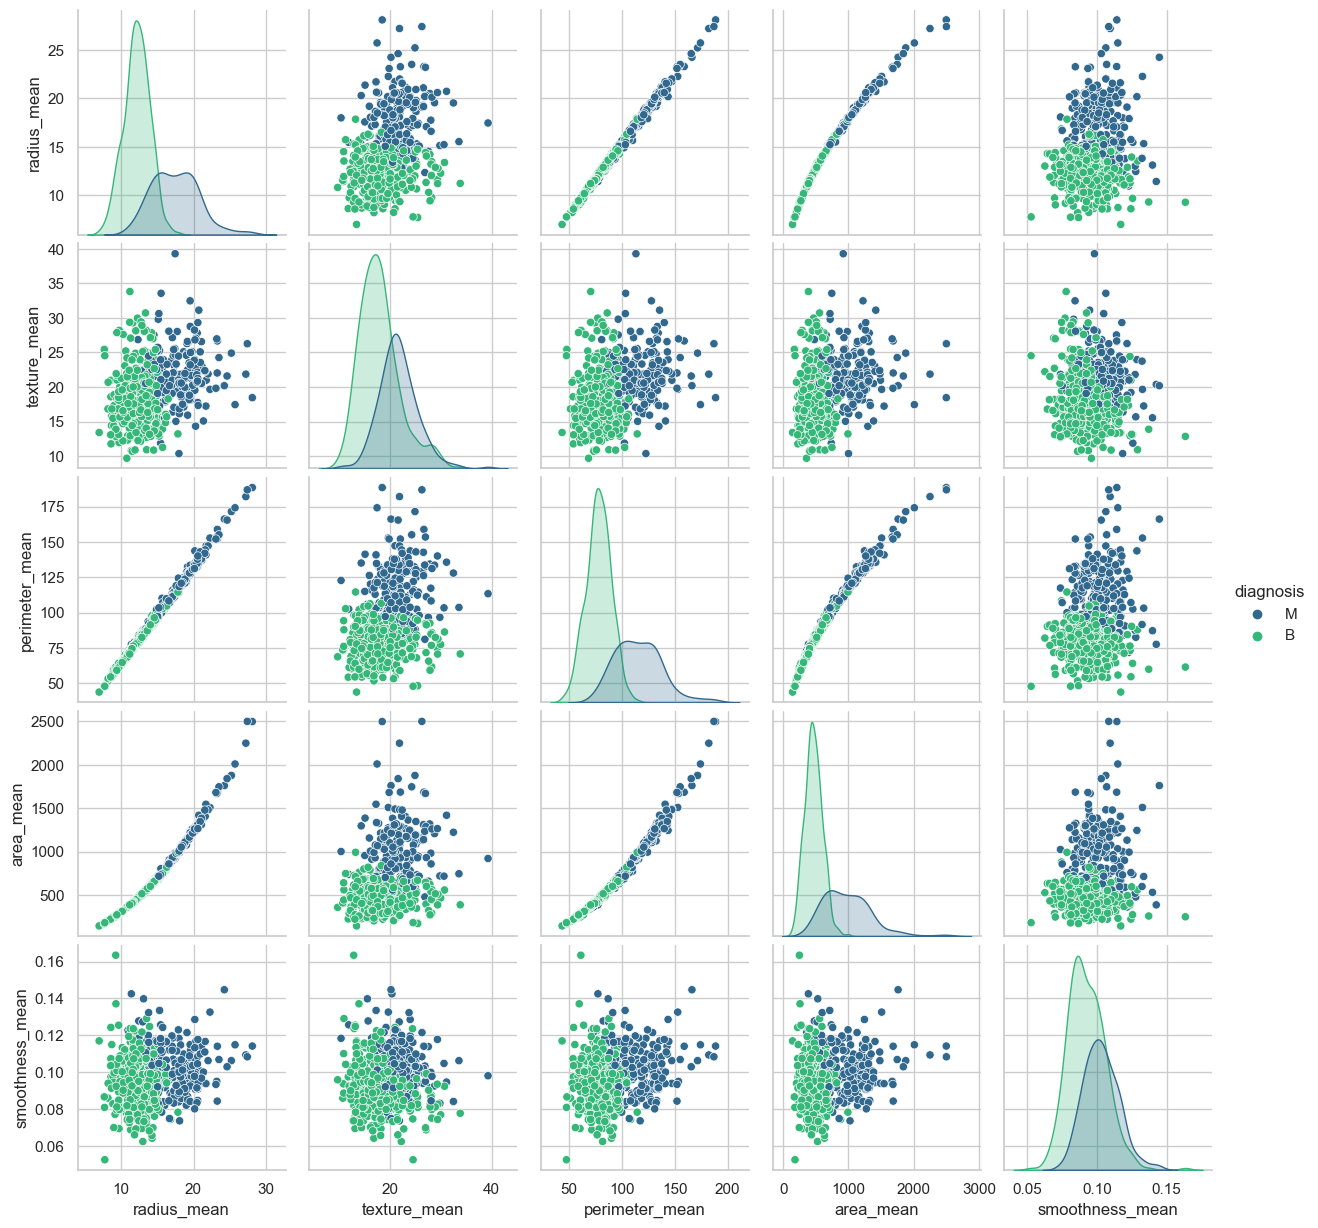

In [24]:
# Select a subset of features
features_subset = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']

# Create a new DataFrame with the selected features
df_subset = df[features_subset]

# Pairplot with the subset of features
sns.pairplot(df_subset, hue='diagnosis', diag_kind='kde', palette='viridis')
plt.show()


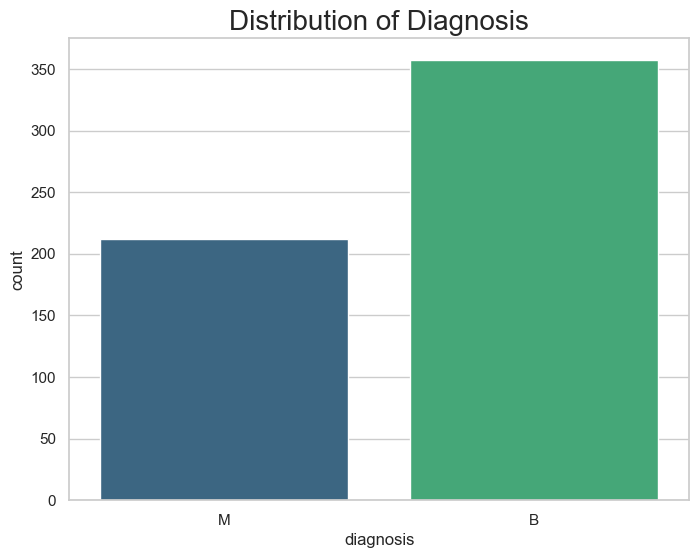

In [25]:
# Set the style and palette for seaborn
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", as_cmap=True)

# Count plot for diagnosis with custom palette
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, palette='viridis')
plt.title('Distribution of Diagnosis', fontsize=20)
plt.show()


##### Convert 'M' (malignant) and 'B' (benign) into integers for model training.


In [26]:
# Encode 'M' as 1 and 'B' as 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


##### Drop the column id from the dataframe as it is not important in prediction 

In [27]:
# Drop the 'id' column as it is not relevant for prediction
df.drop(columns=['id'], inplace=True)

#### Step 4: Train-Test Split

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df is your DataFrame and the target variable 'diagnosis' is already encoded
print(df['diagnosis'].value_counts())

# Separate features and target variable
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Split the data with stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

diagnosis
0    357
1    212
Name: count, dtype: int64


In [29]:
# Scale the features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [35]:
# Handle class imbalance on training data
smote=SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Check the new class distribution
print(pd.Series(y_train_resampled).value_counts())

diagnosis
1    285
0    285
Name: count, dtype: int64


* My class has an imbalance. In the dataset, I have 357 instances of 'B' (benign) and 212 instances of 'M' (malignant).
* This means that the benign class ('B') is more prevalent than the malignant class ('M'). 
* To quantify the imbalance:

    * Benign (B): 357 instances (62.73%)
    * Malignant (M): 212 instances (37.27%)
* I am using SMOTE technicque to handle class imbalance

#### Step 5: Building and Evaluating Machine Learning Models

##### 1.Logistic Regression


##### **Before Hyperparameter Tuning**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize and train the model
logreg=LogisticRegression(random_state=42)
logreg.fit(X_train_scaled,y_train)

# Make predictions
y_pred_logreg=logreg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression:
[[71  1]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.9649122807017544


##### **After Hyperparameter Tuning**

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithm
}

# Initialize Logistic Regression classifier
lr = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_lr.fit(X_train, y_train)

# Get best parameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

# Refit the model with best parameters on the entire training set
best_lr = grid_search_lr.best_estimator_
best_lr.fit(X_train, y_train)

# Evaluate on the test set
test_accuracy_lr = best_lr.score(X_test, y_test)

# Print results
print("Best Parameters for Logistic Regression:", best_params_lr)
print("Best Cross-Validation Accuracy for Logistic Regression:", best_score_lr)
print("Test Set Accuracy with Best Parameters for Logistic Regression:", test_accuracy_lr)


Best Parameters for Logistic Regression: {'C': 100, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy for Logistic Regression: 0.9670329670329669
Test Set Accuracy with Best Parameters for Logistic Regression: 0.9298245614035088


##### 2.Decision Tree

##### **Before Hyperparameter Tuning**

In [38]:
from sklearn.tree import DecisionTreeClassifier

# initialize and train the model
tree=DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled,y_train)

# Make predictions
y_pred_tree=tree.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

Decision Tree:
[[68  4]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Accuracy: 0.9298245614035088


##### **After Hyperparameter Tuning**

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum samples required at each leaf node
}

# Initialize Decision Tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=tree, param_grid=param_grid_dt, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_dt.fit(X_train_scaled, y_train)

# Get best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Refit the model with best parameters on the entire training set
best_dt = grid_search_dt.best_estimator_
best_dt.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = best_dt.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree:")
print("Best Parameters for Decision Tree:", best_params_dt)
print("Best Cross-Validation Accuracy for Decision Tree:", best_score_dt)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree:
Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Accuracy for Decision Tree: 0.9384615384615385
[[69  3]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.93      0.90      0.92        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Accuracy: 0.9385964912280702


##### 3.Random Forest

##### **Before Hyperparameter Tuning**

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_scaled, y_train)

# Make predictions
y_pred_forest = forest.predict(X_test_scaled)

# Evaluate the model
print("Random Forest:")
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))
print("Accuracy:", accuracy_score(y_test, y_pred_forest))

Random Forest:
[[72  0]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum samples required at each leaf node
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_rf.fit(X_train_scaled, y_train)

# Get best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Refit the model with best parameters on the entire training set
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluate the model
print("Random Forest:")
print("Best Parameters for Random Forest:", best_params_rf)
print("Best Cross-Validation Accuracy for Random Forest:", best_score_rf)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest:
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy for Random Forest: 0.9626373626373628
[[72  0]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158


##### 4.Support Vector Machine

##### **Before Hyperparameter Tuning**

In [42]:
from sklearn.svm import SVC

# Train an SVM model
svm = SVC(random_state=42)
svm.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate the SVM model
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix
[[71  1]
 [ 2 40]]
Accuracy: 0.9736842105263158


##### **After Hyperparameter Tuning**

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'kernel': ['linear', 'rbf']       # Kernel type
}

# Initialize SVM classifier
svm = SVC(random_state=42)

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_svm.fit(X_train_scaled, y_train)

# Get best parameters and best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

# Refit the model with best parameters on the entire training set
best_svm = grid_search_svm.best_estimator_
best_svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = best_svm.predict(X_test_scaled)

# Evaluate the model
print("Support Vector Machine (SVM):")
print("Best Parameters for SVM:", best_params_svm)
print("Best Cross-Validation Accuracy for SVM:", best_score_svm)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Support Vector Machine (SVM):
Best Parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy for SVM: 0.9758241758241759
[[72  0]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158


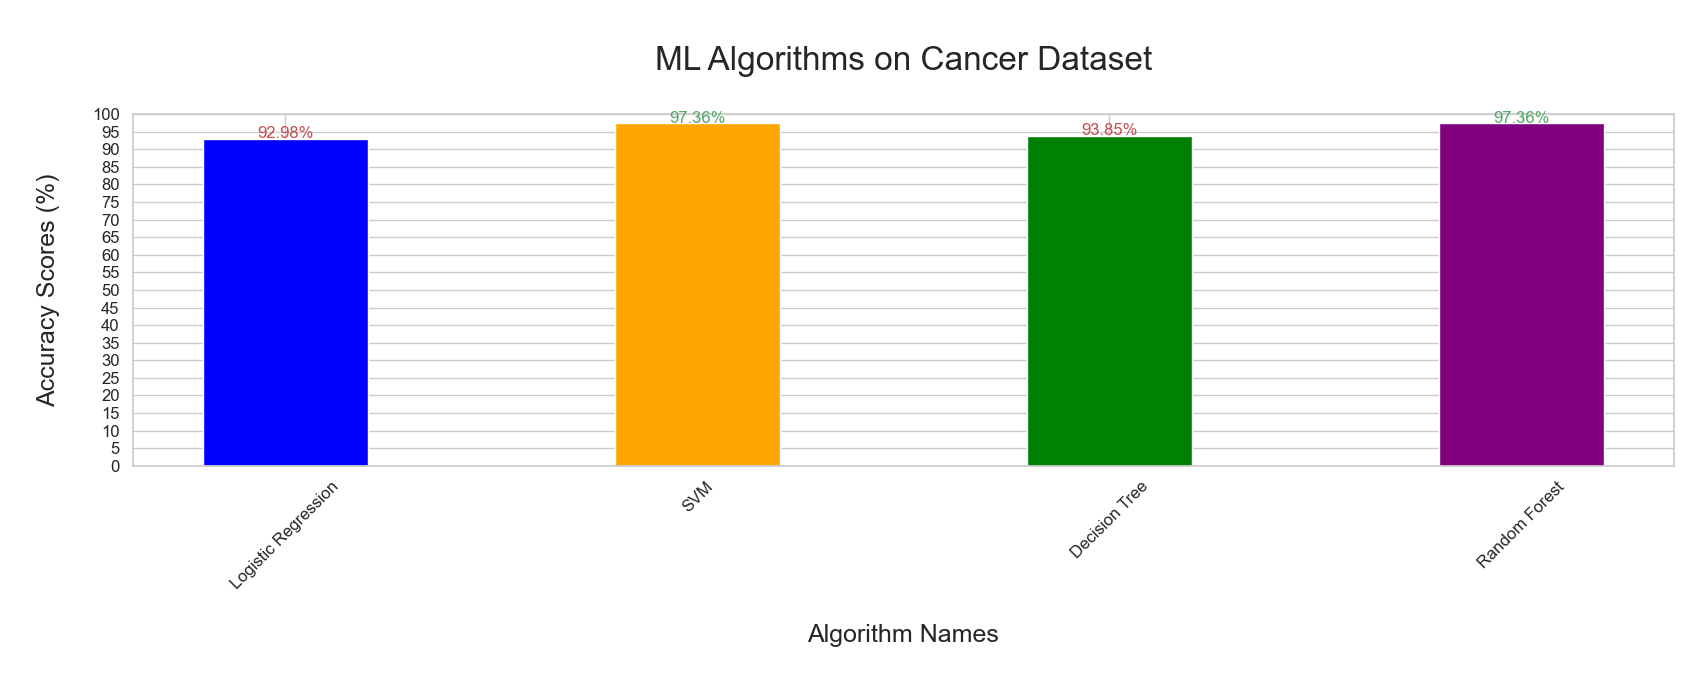

In [44]:
# Example model names and accuracy scores after Hyperparameter Tuning (replace with your actual data)
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
accuracy_scores = np.array([92.98, 97.36, 93.85, 97.36  ])  # Replace with your accuracy scores
ac = np.round(accuracy_scores, decimals=3)

# Colors for bars
color = ['blue', 'orange', 'green', 'purple']

plt.figure(figsize=(17, 7))
plt.bar(model_names, ac, color=color, width=0.4)

# Adding text labels for accuracy scores above each bar
for i in range(len(model_names)):
    if ac[i] > 95:
        plt.text(i, ac[i] + 0.2, f'{ac[i]}%', ha='center', color='g', fontsize=12)
    else:
        plt.text(i, ac[i] + 0.2, f'{ac[i]}%', ha='center', color='r', fontsize=12)

plt.title('\nML Algorithms on Cancer Dataset\n', fontsize=24)
plt.xlabel('\nAlgorithm Names\n', fontsize=18)
plt.ylabel('\nAccuracy Scores (%)\n', fontsize=18)

plt.ylim(0, 100)  # Adjust y-axis limits if needed
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels if they are long
plt.yticks(np.arange(0, 101, 5), fontsize=12)  # Adjust y-axis ticks

plt.tight_layout()
plt.show()


In [45]:
# Define your accuracy values here
accuracy_values = {
    "Random Forest Classifier": 0.97,
    "Support Vector Machine": 0.97,
    "Decision Tree ": 0.93,
    "Logistic Regression": 0.92,
}

# Create a DataFrame from the accuracy values
accuracy_df = pd.DataFrame(list(accuracy_values.items()), columns=['Algorithm', 'Accuracy'])

# Print the DataFrame
print(accuracy_df)

                  Algorithm  Accuracy
0  Random Forest Classifier      0.97
1    Support Vector Machine      0.97
2            Decision Tree       0.93
3       Logistic Regression      0.92


In [47]:
from sklearn.model_selection import cross_val_score

# Logistic Regression Cross-Validation
cv_scores_lr = cross_val_score(best_lr, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Logistic Regression CV Accuracy: %0.2f (+/- %0.2f)" % (cv_scores_lr.mean(), cv_scores_lr.std() * 2))

# Decision Tree Cross-Validation
cv_scores_dt = cross_val_score(best_dt, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Decision Tree CV Accuracy: %0.2f (+/- %0.2f)" % (cv_scores_dt.mean(), cv_scores_dt.std() * 2))

# Random Forest Cross-Validation
cv_scores_rf = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy: %0.2f (+/- %0.2f)" % (cv_scores_rf.mean(), cv_scores_rf.std() * 2))

# SVM Cross-Validation
cv_scores_svm = cross_val_score(best_svm, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("SVM CV Accuracy: %0.2f (+/- %0.2f)" % (cv_scores_svm.mean(), cv_scores_svm.std() * 2))


Logistic Regression CV Accuracy: 0.97 (+/- 0.03)
Decision Tree CV Accuracy: 0.94 (+/- 0.07)
Random Forest CV Accuracy: 0.96 (+/- 0.07)
SVM CV Accuracy: 0.98 (+/- 0.03)


**Cross-Validation Accuracy Summary**
1. Logistic Regression
    * Mean Accuracy: 0.97
        * The model correctly classifies 97% of the samples on average.
    * Standard Deviation: ±0.03
        * Indicates low variability in performance across different cross-validation folds, suggesting consistent performance.
2. Decision Tree
    * Mean Accuracy: 0.94
        * The model correctly classifies 94% of the samples on average.
    * Standard Deviation: ±0.07
        * Indicates higher variability in performance across different folds, suggesting less consistent performance.
3. Random Forest
    * Mean Accuracy: 0.96
        * The model correctly classifies 96% of the samples on average.
    * Standard Deviation: ±0.07
        * Indicates some variability in performance across different folds.
4. SVM (Support Vector Machine)
    * Mean Accuracy: 0.98
        * The model correctly classifies 98% of the samples on average.
    * Standard Deviation: ±0.03
        * Indicates low variability in performance across different cross-validation folds, suggesting consistent performance.





